In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go

In [2]:
xls = pd.ExcelFile('COVIDsurveytables30June2020.xlsx')
df1 = pd.read_excel(xls, 'sample size-daily')
df2 = pd.read_excel(xls, 'sample size-weekly')
df3 = pd.read_excel(xls, 'respondent demographics')
df4 = pd.read_excel(xls, 'comorbs all people in sample')
df5 = pd.read_excel(xls, 'contact')
df6 = pd.read_excel(xls, 'testing')
df7 = pd.read_excel(xls, 'cumulative contact & testing')
df8 = pd.read_excel(xls, 'testing other conditions')
df9 = pd.read_excel(xls, 'Cases')
df10 = pd.read_excel(xls, 'symptoms among unwell')
df11 = pd.read_excel(xls, 'symptoms among COVID-19 cases')
df12 = pd.read_excel(xls, 'comorbidities among unwell')
df13 = pd.read_excel(xls, 'sought medical care')
df14 = pd.read_excel(xls, 'behavior')
df15 = pd.read_excel(xls, 'access')
df16 = pd.read_excel(xls, 'zipcode')

## Sample size - daily

In [3]:
df1 = df1[2:]
df1.columns = ['drop', 'date_joined', 'num_ppl', 'ppl_cumulative', 'num_house', 'house_cumulative']
df1 = df1.drop(['drop'], axis=1)

In [4]:
df1

,date_joined,num_ppl,ppl_cumulative,num_house,house_cumulative
2,20APR2020,423,423,166,166
3,21APR2020,1030,1453,415,581
4,22APR2020,764,2217,307,888
5,23APR2020,870,3087,357,1245
6,24APR2020,634,3721,261,1506
...,...,...,...,...,...
68,25JUN2020,35,7299,12,2861
69,26JUN2020,20,7319,8,2869
70,27JUN2020,5,7324,4,2873
71,28JUN2020,12,7336,4,2877


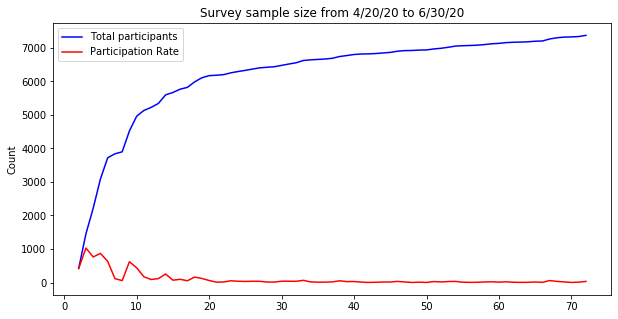

In [5]:
plt.subplots(1, sharex=True, figsize = (10, 5))
p_cumulative = df1['ppl_cumulative'].plot(kind='line', color = 'blue')
people = df1['num_ppl'].plot(kind='line', color = 'red')

plt.title("Survey sample size from 4/20/20 to 6/30/20")
plt.ylabel('Count')
plt.legend(('Total participants', 'Participation Rate'));

In [21]:
# Creating trace1
trace1 = go.Scatter(
                    x = df1['date_joined'],
                    y = df1['ppl_cumulative'],
                    mode = "lines",
                    name = "total participants",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))


# Creating trace2
trace2 = go.Scatter(
                    x = df1['date_joined'],
                    y = df1['num_ppl'],
                    mode = "lines",
                    name = "join rate",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2]

layout = dict(title = 'Daily survey sample size from 4/20/20 to 6/30/20',
              xaxis= dict(title= 'Date',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=700,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

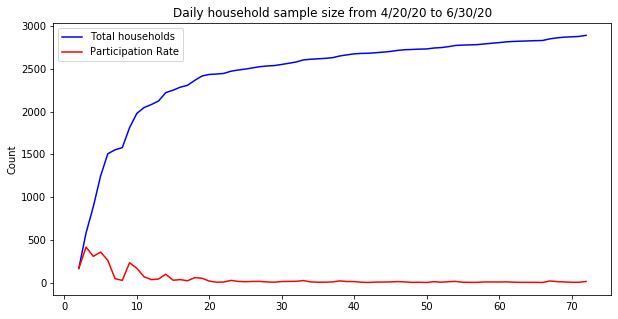

In [17]:
plt.subplots(1, sharex=True, figsize = (10, 5))
h_cumulative = df1['house_cumulative'].plot(kind='line', color = 'blue')
house = df1['num_house'].plot(kind='line', color = 'red')

plt.title("Daily household sample size from 4/20/20 to 6/30/20")
plt.ylabel('Count')
plt.legend(('Total households', 'Participation Rate'));

In [20]:
# Creating trace1
trace1 = go.Scatter(
                    x = df1['date_joined'],
                    y = df1['house_cumulative'],
                    mode = "lines",
                    name = "total households",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))


# Creating trace2
trace2 = go.Scatter(
                    x = df1['date_joined'],
                    y = df1['num_house'],
                    mode = "lines",
                    name = "join rate",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2]

layout = dict(title = 'Daily household sample size from 4/20/20 to 6/30/20',
              xaxis= dict(title= 'Date',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=700,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

## Sample size - weekly

In [12]:
df2 = df2[2:]
df2.columns = ['drop', 'week_joined', 'num_ppl', 'ppl_cumulative', 'num_house', 'house_cumulative']
df2 = df2.drop(['drop'], axis=1)

In [13]:
df2

,week_joined,num_ppl,ppl_cumulative,num_house,house_cumulative
2,20APR2020,3898,3898,1578,1578
3,27APR2020,4709,8607,1891,3469
4,04MAY2020,4089,12696,1664,5133
5,11MAY2020,3352,16048,1400,6533
6,18MAY2020,2951,18999,1232,7765
7,25MAY2020,2687,21686,1139,8904
8,01JUN2020,2378,24064,1016,9920
9,08JUN2020,2322,26386,977,10897
10,15JUN2020,2171,28557,917,11814
11,22JUN2020,2139,30696,900,12714


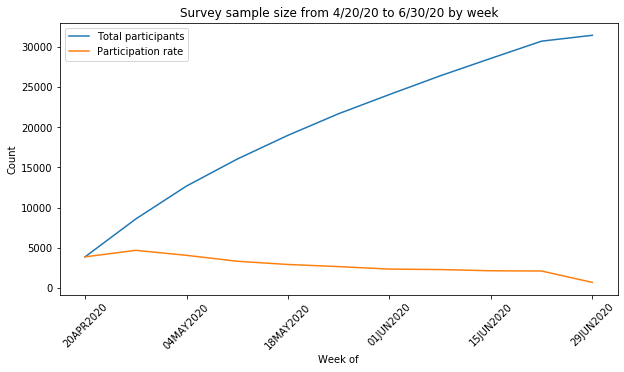

In [14]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot1 = df2.plot.line(x="week_joined", y="ppl_cumulative", label = 'Total participants', ax=ax)
plot2 = df2.plot.line(x="week_joined", y="num_ppl", label = 'Participation rate', ax=ax)
plt.xticks(rotation=45);
plt.title('Survey sample size from 4/20/20 to 6/30/20 by week')
plt.xlabel('Week of')
plt.ylabel('Count');

In [19]:
# Creating trace1
trace1 = go.Scatter(
                    x = df2['week_joined'],
                    y = df2['ppl_cumulative'],
                    mode = "lines",
                    name = "total participants",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))


# Creating trace2
trace2 = go.Scatter(
                    x = df2['week_joined'],
                    y = df2['num_ppl'],
                    mode = "lines",
                    name = "join rate",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2]

layout = dict(title = 'Survey sample size from 4/20/20 to 6/30/20 by week',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=700,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

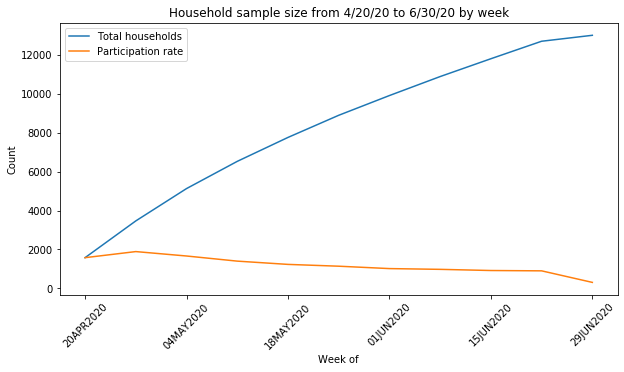

In [15]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot3 = df2.plot.line(x="week_joined", y="house_cumulative", label = 'Total households', ax=ax)
plot4 = df2.plot.line(x="week_joined", y="num_house", label = 'Participation rate', ax=ax)
plt.xticks(rotation=45);
plt.title('Household sample size from 4/20/20 to 6/30/20 by week')
plt.xlabel('Week of')
plt.ylabel('Count');

In [23]:
# Creating trace1
trace1 = go.Scatter(
                    x = df2['week_joined'],
                    y = df2['house_cumulative'],
                    mode = "lines",
                    name = "total households",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))


# Creating trace2
trace2 = go.Scatter(
                    x = df2['week_joined'],
                    y = df2['num_house'],
                    mode = "lines",
                    name = "join rate",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2]

layout = dict(title = 'Household sample size from 4/20/20 to 6/30/20 by week',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=700,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

## Respondent demographics

In [24]:
df3_age = df3[10:18]
df3_age.columns = ['drop', 'Age', 'Frequency', 'Percent']
df3_age = df3_age.drop(['drop'], axis=1)

In [25]:
df3_age

,Age,Frequency,Percent
10,Less than 20y,57,0.0197027
11,20-29,272,0.09402
12,30-39,413,0.142758
13,40-49,506,0.174905
14,50-59,576,0.199101
15,60-69,702,0.242655
16,70-79,338,0.116834
17,80+,29,0.0100242


In [26]:
age_vals = df3_age['Percent'].values.flatten().tolist()
age_labels = df3_age['Age'].tolist()

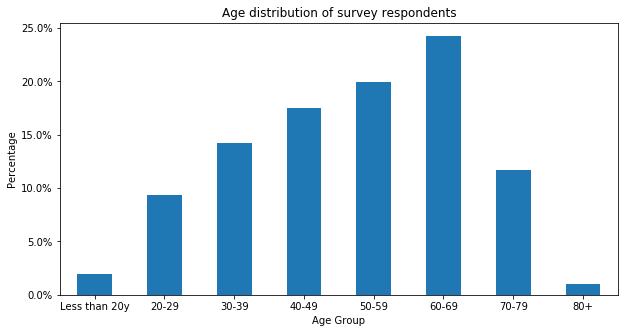

In [27]:
age_demog = pd.DataFrame({'age':age_vals}, index = age_labels)
Aplot = age_demog.plot.bar(legend = False, figsize=(10,5));
Aplot.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Age distribution of survey respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=0);
plt.ylabel('Percentage');

In [42]:
trace = go.Bar(
                x = age_labels,
                y = age_vals,
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace]
layout = dict(title = 'Age distribution of survey respondents',
              xaxis= dict(title= 'Age group',ticklen= 5,tickangle = 0, zeroline= False),
              yaxis= dict(title= 'Percentage',ticklen= 5,zeroline= False, tickformat = ',.0%'),
              autosize=False, 
              width=800,
              height=500,)
    
fig = dict(data = data, layout = layout)
iplot(fig)

In [43]:
df3_occ = df3[33:39]
df3_occ.columns = ['drop', 'Occupation', 'Frequency', 'Percent']
df3_occ = df3_occ.drop(['drop'], axis=1)

In [44]:
occ_vals = df3_occ['Percent'].values.flatten().tolist()
occ_labels = df3_occ['Occupation'].tolist()

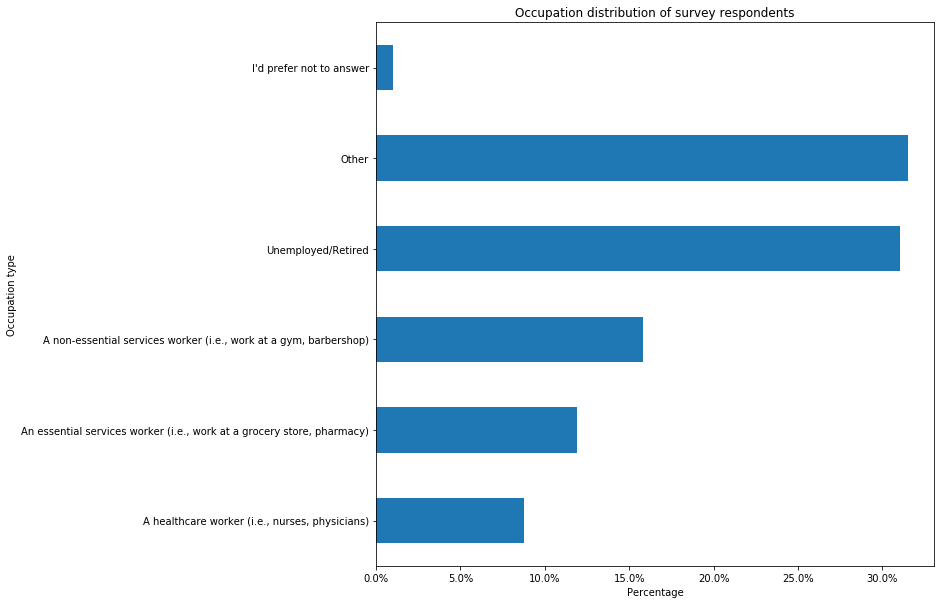

In [45]:
occ_demog = pd.DataFrame({'occ':occ_vals}, index = occ_labels)
Bplot = occ_demog.plot.barh(legend = False, figsize=(10,10));
Bplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Occupation distribution of survey respondents')
plt.xlabel('Percentage')
plt.ylabel('Occupation type');

In [48]:
trace = go.Bar(
                x=occ_vals,
                y=occ_labels,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h',
)

data = [trace]
layout = dict(title = 'Occupation distribution of survey respondents',
              xaxis= dict(title= 'Percentage',ticklen= 5,tickangle = 0, zeroline= False, tickformat = ',.0%'),
              yaxis= dict(title= 'Occupation type',ticklen= 5,zeroline= False),
              autosize=False, 
              width=1000,
              height=500,)
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Comorbidities across total participants

In [49]:
df4 = df4[2:]
df4.columns = ['drop', 'comorbidity', 'count', '%total']
df4 = df4.drop(['drop'], axis=1)

In [50]:
comorb_vals = df4['%total'].values.flatten().tolist()
comorb_labels = df4['comorbidity'].tolist()

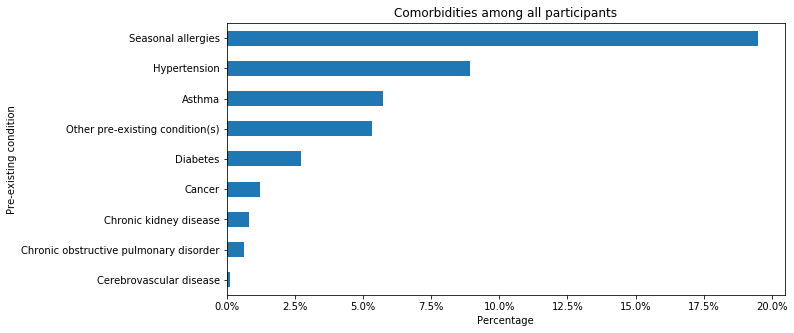

In [51]:
comorb = pd.DataFrame({'comorbidities':comorb_vals}, index = comorb_labels)
comorb.sort_values('comorbidities',inplace=True)
Cplot = comorb.plot.barh(legend = False, figsize=(10,5));
Cplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Comorbidities among all participants')
plt.xlabel('Percentage')
plt.ylabel('Pre-existing condition');

In [59]:
trace = go.Bar(
                x=comorb_vals,
                y=comorb_labels,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h',
)

data = [trace]
layout = dict(title = 'Comorbidities among all participants',
              xaxis= dict(title= 'Percentage',ticklen= 5,tickangle = 0, zeroline= False, tickformat = ',.0%'),
              yaxis= dict(title= 'Pre-existing condition',ticklen= 5,zeroline= False, categoryorder='total ascending'),
              autosize=False, 
              width=1000,
              height=500,)
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Contact with positive Covid patient in past two weeks

In [60]:
df5 = df5[3:]

In [61]:
df5_clean = df5.drop(df5.index[-1])

In [62]:
week_index = []
for row in df5_clean.iloc[:,1]:
    week_index.append(row)

In [63]:
n1_array = np.array(df5_clean.iloc[:, 3])
n2_array = np.array(df5_clean.iloc[:, 5])
n3_array = np.array(df5_clean.iloc[:, 7])
n4_array = np.array(df5_clean.iloc[:, 9])

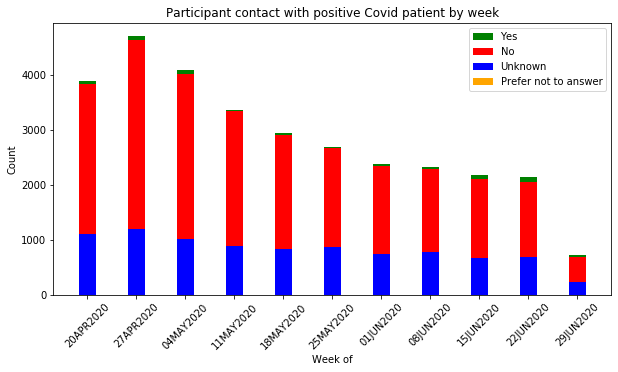

In [64]:
plt.figure(figsize=(10,5))
plt.bar(week_index, n1_array, width=0.35, label = 'Yes', color='green', bottom = n2_array+n3_array)
plt.bar(week_index, n2_array, width=0.35, label = 'No', color='red', bottom = n3_array)
plt.bar(week_index, n3_array, width=0.35, label = 'Unknown', color='blue')
plt.bar(week_index, n4_array, width=0.35, label = 'Prefer not to answer', color='orange', bottom = n1_array+n2_array+n3_array)
plt.xticks(rotation=45)
plt.title('Participant contact with positive Covid patient by week')
plt.xlabel('Week of')
plt.ylabel('Count')
plt.legend();

In [68]:
x = df5_clean['Unnamed: 1']

trace1 = {
  'x': x,
  'y': n1_array,
  'name': 'Yes',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': n2_array,
  'name': 'No',
  'type': 'bar'
};
trace3 = {
  'x': x,
  'y': n3_array,
  'name': 'Unknown',
  'type': 'bar'
};
trace4 = {
  'x': x,
  'y': n4_array,
  'name': 'Prefer not to answer',
  'type': 'bar'
};
data = [trace2, trace3, trace4, trace1];

layout = dict(title = 'Participant contact with positive Covid patient by week',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=800,
              height=500,
             barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

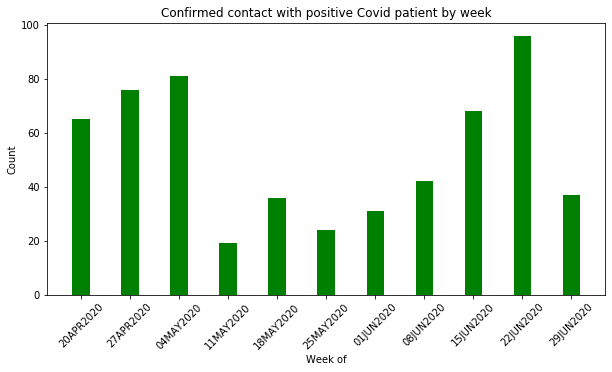

In [69]:
plt.figure(figsize=(10,5))
plt.bar(week_index, n1_array, width=0.35, label = 'Yes', color='green')
plt.xticks(rotation=45)
plt.title('Confirmed contact with positive Covid patient by week')
plt.xlabel('Week of')
plt.ylabel('Count');

In [74]:
trace = go.Bar(
                x = df5_clean['Unnamed: 1'],
                y = n1_array,
                marker = dict(color = 'purple',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace]
layout = dict(title = 'Confirmed contact with positive Covid patient by week',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=800,
              height=500,)
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Testing

In [76]:
df6 = df6[2:]

In [77]:
df6_clean = df6.drop(df6.index[-1])

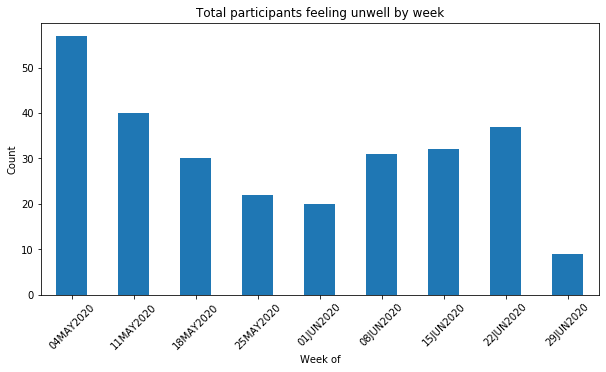

In [78]:
df6_clean.plot.bar(x="Unnamed: 1", y="Unnamed: 3", legend = False, figsize = (10,5))
plt.title('Total participants feeling unwell by week')
plt.xlabel('Week of')
plt.ylabel('Count')
plt.xticks(rotation=45);

In [79]:
trace = go.Bar(
                x = df6_clean['Unnamed: 1'],
                y = df6_clean['Unnamed: 3'],
                marker = dict(color = 'blue',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace]
layout = dict(title = 'Total participants feeling unwell by week',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=700,
              height=500,)
    
fig = dict(data = data, layout = layout)
iplot(fig)

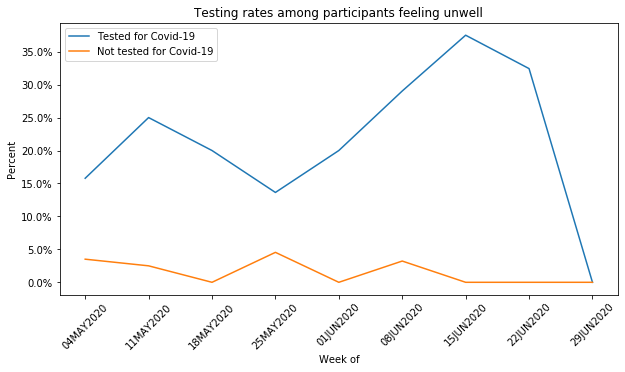

In [80]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(10,5))
plot1 = df6_clean.plot.line(x="Unnamed: 1", y="Unnamed: 6", label = 'Tested for Covid-19', ax=ax)
plot1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot2 = df6_clean.plot.line(x="Unnamed: 1", y="Unnamed: 9", label = 'Not tested for Covid-19', ax=ax)
plot2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.xticks(rotation=45);
plt.title('Testing rates among participants feeling unwell')
plt.xlabel('Week of')
plt.ylabel('Percent');

In [82]:
# Creating trace1
trace1 = go.Scatter(
                    x = df6_clean['Unnamed: 1'],
                    y = df6_clean['Unnamed: 6'],
                    mode = "lines",
                    name = "Tested for Covid-19",
                    marker = dict(color = 'blue'))


# Creating trace2
trace2 = go.Scatter(
                    x = df6_clean['Unnamed: 1'],
                    y = df6_clean['Unnamed: 9'],
                    mode = "lines",
                    name = "Not tested for Covid-19",
                    marker = dict(color = 'orange'))


data = [trace1, trace2]

layout = dict(title = 'Testing rates among participants feeling unwell',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Percentage',ticklen= 5,zeroline= False, tickformat = ',.0%'),
              autosize=False, 
              width=700,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

## Cumulative contact and testing

In [83]:
df7 = df7[2:]

In [84]:
df7

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,NaN,Ever reported contact with anyone who was a co...,341,0.046206,119,0.0411338
3,NaN,Ever tested for COVID-19,68,0.00921409,62,0.021431
4,NaN,Ever tested positive for COVID-19,7,0.000948509,5,0.00172831
5,NaN,Ever tested positive for COVID-19 or diagnosed...,16,0.00216802,13,0.00449361


In [85]:
person_level = df7['Unnamed: 2'].values.flatten().tolist()
household_level = df7['Unnamed: 4'].values.flatten().tolist()
plotindex = df7['Unnamed: 1'].tolist()

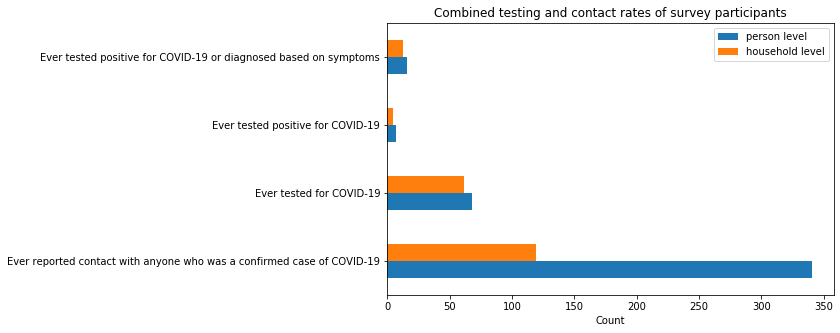

In [86]:
graph = pd.DataFrame({'person level': person_level, 'household level': household_level}, index= plotindex)
ax = graph.plot.barh(rot=0, figsize=(8,5))
plt.title('Combined testing and contact rates of survey participants')
plt.xlabel('Count');

In [91]:
trace1 = go.Bar(
                x=person_level,
                y=plotindex,
                name = "person level",
                marker=dict(color='blue',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h')

trace2 = go.Bar(
                x=household_level,
                y=plotindex,
                name = "household level",
                marker=dict(color='orange',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h')

data = [trace1, trace2]
layout = dict(title = 'Combined testing and contact rates of survey participants',
              xaxis= dict(title= 'Count',ticklen= 5, zeroline= False),
              autosize=False, 
              width=1000,
              height=500,
              barmode = 'group')
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Testing other conditions

In [92]:
df8 = df8[2:]

In [93]:
df8 = df8.rename(columns={"NOTE: no participants have been tested for Dengue yet, so that has been left blank": "start_week"})

In [94]:
test_vals = df8.loc[df8['start_week'] == "Total", ['Unnamed: 4','Unnamed: 9','Unnamed: 19']].values.flatten().tolist()
positive_vals = df8.loc[df8['start_week'] == "Total", ['Unnamed: 7','Unnamed: 12','Unnamed: 22']].values.flatten().tolist()
test_index = ['Influenza', 'RSV', 'Pneumonia']

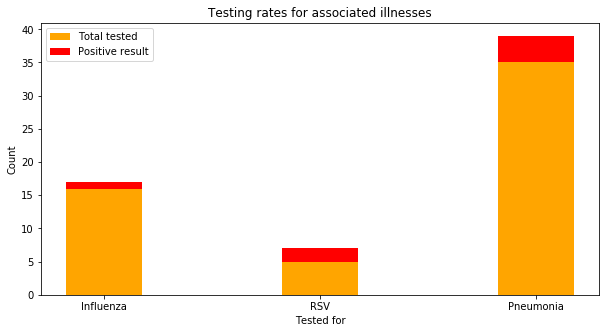

In [95]:
plt.figure(figsize=(10,5))
plt.bar(test_index, test_vals, width=0.35, label = 'Total tested', color='orange')
plt.bar(test_index, positive_vals, width=0.35, label = 'Positive result', color='red', bottom = test_vals)
plt.title('Testing rates for associated illnesses')
plt.xlabel('Tested for')
plt.ylabel('Count')
plt.legend();

In [98]:
x = test_index

trace1 = {
  'x': x,
  'y': test_vals,
  'name': 'Total tested',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': positive_vals,
  'name': 'Positive result',
  'type': 'bar'
};

data = [trace1, trace2];

layout = dict(title = 'Testing rates for associated illnesses',
              xaxis= dict(title= 'Tested for',ticklen= 5, zeroline= False),
              yaxis= dict(title= 'Count',ticklen= 5,zeroline= False),
              autosize=False, 
              width=800,
              height=500,
             barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Cases

In [99]:
df9 = df9[2:]
df9["Unnamed: 9"] = df9["Unnamed: 9"].fillna(0)

In [100]:
df9_clean = df9.drop(df9.index[-1])

In [101]:
df9_clean

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2,NaN,20APR2020,3898,3701,71,0.0182145,1,0.000256542,0.0140845,0.076923,3,0.000769625,0.0422535,4,0.00102617,0.056338
3,NaN,27APR2020,4709,4475,86,0.0182629,4,0.000849437,0.0465116,0.235294,4,0.000849437,0.0465116,8,0.00169887,0.0930233
4,NaN,04MAY2020,4089,3915,57,0.0139398,3,0.000733676,0.0526316,0.333333,1,0.000244559,0.0175439,4,0.000978234,0.0701754
5,NaN,11MAY2020,3352,3227,40,0.0119332,0,0,0,0.000000,0,0,0,0,0,0
6,NaN,18MAY2020,2951,2850,30,0.010166,0,0,0,0.000000,0,0,0,0,0,0
7,NaN,25MAY2020,2687,2591,22,0.00818757,0,0,0,0.000000,0,0,0,0,0,0
8,NaN,01JUN2020,2378,2326,20,0.00841043,0,0,0,0.000000,0,0,0,0,0,0
9,NaN,08JUN2020,2322,2228,31,0.0133506,0,0,0,0.000000,0,0,0,0,0,0
10,NaN,15JUN2020,2171,2074,32,0.0147398,1,0.000460617,0.03125,0.083333,1,0.000460617,0.03125,2,0.000921234,0.0625
11,NaN,22JUN2020,2139,2046,37,0.0172978,1,0.000467508,0.027027,0.083333,0,0,0,1,0.000467508,0.027027


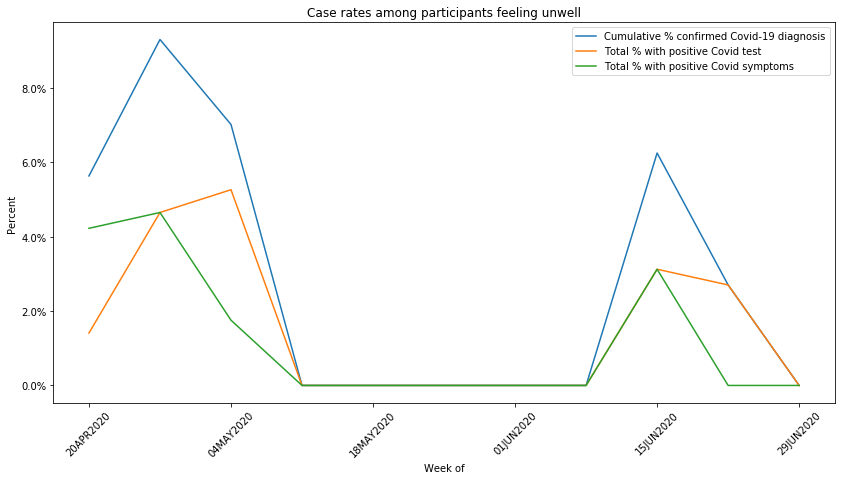

In [102]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(14,7))
plot5 = df9_clean.plot.line(x="Unnamed: 1", y="Unnamed: 15", label = 'Cumulative % confirmed Covid-19 diagnosis', ax=ax)
plot5.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot6 = df9_clean.plot.line(x="Unnamed: 1", y="Unnamed: 8", label = 'Total % with positive Covid test', ax=ax)
plot6.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot7 = df9_clean.plot.line(x="Unnamed: 1", y="Unnamed: 12", label = 'Total % with positive Covid symptoms', ax=ax)
plot7.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.xticks(rotation=45);
plt.title('Case rates among participants feeling unwell')
plt.xlabel('Week of')
plt.ylabel('Percent');

In [35]:
df9_clean['Unnamed: 5'].astype('float64').corr(df9_clean['Unnamed: 7'].astype('float64'))

0.7103059337815798

In [33]:
df9_clean['Unnamed: 8'].astype('float64').corr(df9_clean['Unnamed: 9'].astype('float64'))

0.9489125433862181

> This Pearson's correlation coefficient shows that there is a strong positive relationship between the rates of participants feeling unwell and testing frequency. This implies that higher rates of testing will lead to a higher number of people being diagnosed as positive for Covid-19. 

In [105]:
# Creating trace1
trace1 = go.Scatter(
                    x = df9_clean['Unnamed: 1'],
                    y = df9_clean['Unnamed: 15'],
                    mode = "lines",
                    name = "Cumulative % confirmed Covid-19 diagnosis",
                    marker = dict(color = 'blue'))


# Creating trace2
trace2 = go.Scatter(
                    x = df9_clean['Unnamed: 1'],
                    y = df9_clean['Unnamed: 8'],
                    mode = "lines",
                    name = "Total % with positive Covid test",
                    marker = dict(color = 'orange'))

# Creating trace3
trace3 = go.Scatter(
                    x = df9_clean['Unnamed: 1'],
                    y = df9_clean['Unnamed: 12'],
                    mode = "lines",
                    name = "Total % with positive Covid symptoms",
                    marker = dict(color = 'green'))


data = [trace1, trace2, trace3]

layout = dict(title = 'Case rates among participants feeling unwell',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Percent',ticklen= 5,zeroline= False, tickformat = ',.0%'),
              autosize=False, 
              width=900,
              height=500)
fig = dict(data = data, layout = layout)
iplot(fig)

## Symptoms among unwell vs symptoms among Covid-19 cases

In [107]:
symp_vals = df10.loc[df10['Unnamed: 1'] == "Total", ['Unnamed: 6', 'Unnamed: 9', 'Unnamed: 12',  'Unnamed: 15', 'Unnamed: 18', 'Unnamed: 21', 'Unnamed: 24', 'Unnamed: 27', 'Unnamed: 30', 'Unnamed: 33', 'Unnamed: 36', 'Unnamed: 39', 'Unnamed: 42',]].values.flatten().tolist()
symp_vals2 = df11.loc[df11['Unnamed: 1'] == "Total", ['Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8',  'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26', 'Unnamed: 28',]].values.flatten().tolist()
symp_labels = ['Fatigue', 'Cough', 'Nausea/Vomiting', 'Sore throat', 'Fever', 'Diarrhea', 'Difficulty breathing', 'Body aches', 'Chills', 'Headache', 'Rash', 'Pink eye', 'Loss of smell/taste']

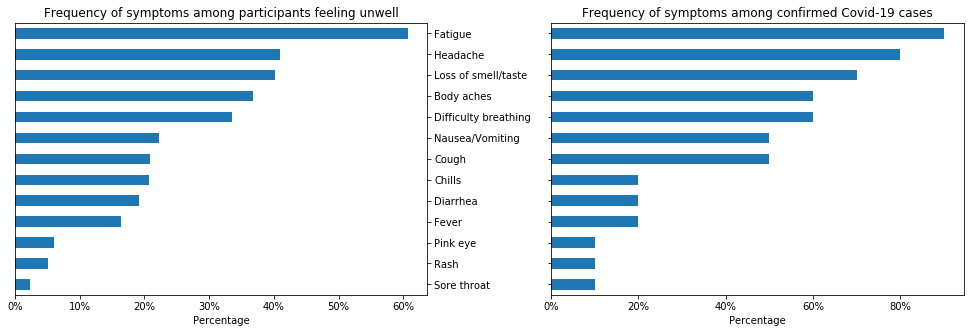

In [108]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(17,5))
unwell_symp = pd.DataFrame({'symptoms':symp_vals}, index = symp_labels)
unwell_symp.sort_values('symptoms',inplace=True)
unwell_symp.plot.barh(legend = False, ax=ax, title = 'Frequency of symptoms among participants feeling unwell')
covid_symp = pd.DataFrame({'symptoms':symp_vals2}, index = symp_labels)
covid_symp.sort_values('symptoms',inplace=True)
covid_symp.plot.barh(legend = False, ax=ax2, title = 'Frequency of symptoms among confirmed Covid-19 cases')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0));
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0));
ax.yaxis.tick_right()
plt.subplots_adjust(wspace=.3)
ax.set_xlabel('Percentage')
ax2.set_xlabel('Percentage');

In [146]:
np.corrcoef(symp_vals, symp_vals2)

array([[1.        , 0.60206197],
       [0.60206197, 1.        ]])

> Based on this correlation coefficient we can conclude there is a moderate positive relationship between symptoms of those who are unwell and symptoms of confirmed Covid-19 cases.

In [114]:
trace1 = go.Bar(
                x=symp_vals,
                y=symp_labels,
                name = "feeling unwell",
                marker=dict(color='blue',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h')

trace2 = go.Bar(
                x=symp_vals2,
                y=symp_labels,
                name = "positive Covid-19 test",
                marker=dict(color='orange',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                orientation='h')

data = [trace1, trace2]
layout = dict(title = 'Frequency of symptoms among survey participants',
              xaxis= dict(title= 'Percentage',ticklen= 5, zeroline= False, tickformat = ',.0%'),
              yaxis= dict(title= 'Symptom',ticklen= 5,zeroline= False, categoryorder='total ascending'),
              autosize=False, 
              width=1000,
              height=600,
              barmode = 'group')
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Comorbidities among unwell

> Comorbidities among Covid-19 cases was mostly blank so a comparison was not performed.

In [116]:
comorbs = df12.loc[df12['Unnamed: 1'] == "Total", ['Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9',  'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23']].values.flatten().tolist()
comorb_labels = ['Hypertension', 'Cancer', 'Diabetes', 'Asthma', 'Seasonal allergies', 'Chronic kidney disease', 'Cerebrovascular disease', 'COPD', 'Other', 'None']

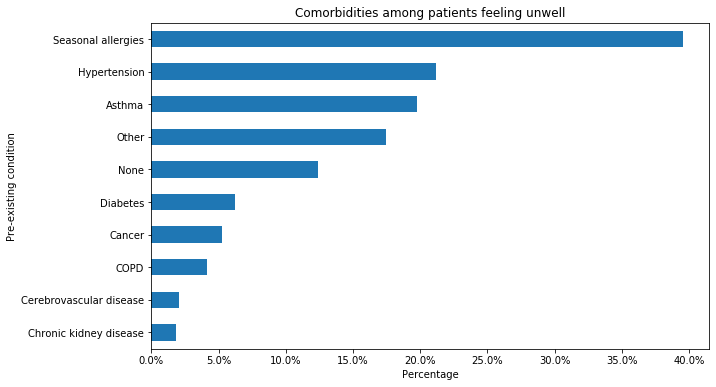

In [118]:
unwell_comorb = pd.DataFrame({'comorbidities':comorbs}, index = comorb_labels)
unwell_comorb.sort_values('comorbidities',inplace=True)
C2plot = unwell_comorb.plot.barh(legend = False, figsize=(10,6));
C2plot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Comorbidities among patients feeling unwell')
plt.xlabel('Percentage')
plt.ylabel('Pre-existing condition');

In [119]:
trace = go.Bar(
                x=comorbs,
                y=comorb_labels,
                marker=dict(color='blue',line=dict(color='black',width=1)),
                orientation='h')

data = [trace]
layout = dict(title = 'Comorbidities among patients feeling unwell',
              xaxis= dict(title= 'Percentage',ticklen= 5, zeroline= False, tickformat = ',.0%'),
              yaxis= dict(title= 'Pre-existing condition',ticklen= 5,zeroline= False, categoryorder='total ascending'),
              autosize=False, 
              width=800,
              height=500)
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Seeking medical care

In [121]:
total_unwell = df13['Unnamed: 3'].iloc[-1]
hosp = df13['Unnamed: 6'].iloc[-1]
clinic = df13['Unnamed: 7'].iloc[-1]
virtual = df13['Unnamed: 8'].iloc[-1]
no = df13['Unnamed: 9'].iloc[-1]
yes = df13['Unnamed: 4'].iloc[-1]
prefer = df13['Unnamed: 10'].iloc[-1]
chart_vals = [hosp, clinic, virtual, no, prefer]
chart_vals[:] = [x / total_unwell for x in chart_vals]
chart_labels = ['At hospital/ER', 'At clinic or doctors office', 'Virtual appointment', 'Did not seek care', 'Prefer not to say']

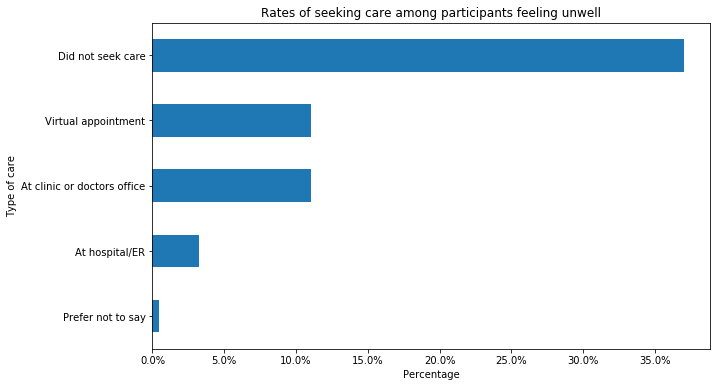

In [123]:
s_c = pd.DataFrame({'sought_care':chart_vals}, index = chart_labels)
s_c.sort_values('sought_care',inplace=True)
scplot = s_c.plot.barh(legend = False, figsize=(10,6));
scplot.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Rates of seeking care among participants feeling unwell')
plt.xlabel('Percentage')
plt.ylabel('Type of care');

In [124]:
trace = go.Bar(
                x=chart_vals,
                y=chart_labels,
                marker=dict(color='blue',line=dict(color='black',width=1)),
                orientation='h')

data = [trace]
layout = dict(title = 'Rates of seeking care among participants feeling unwell',
              xaxis= dict(title= 'Percentage',ticklen= 5, zeroline= False, tickformat = ',.0%'),
              yaxis= dict(title= 'Type of care',ticklen= 5,zeroline= False, categoryorder='total ascending'),
              autosize=False, 
              width=800,
              height=500)
    
fig = dict(data = data, layout = layout)
iplot(fig)

In [125]:
chart2_vals = [yes, no, prefer]
chart2_vals[:] = [x / total_unwell for x in chart2_vals]
chart2_labels = ['Yes', 'No', 'Prefer not to say']

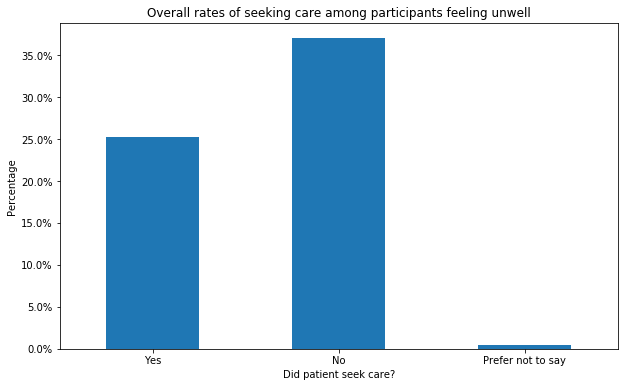

In [126]:
totalsought = pd.DataFrame({'sought':chart2_vals}, index = chart2_labels)
TSplot = totalsought.plot.bar(legend = False, figsize=(10,6));
TSplot.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.title('Overall rates of seeking care among participants feeling unwell')
plt.xticks(rotation=0);
plt.xlabel('Did patient seek care?')
plt.ylabel('Percentage');

In [130]:
trace = go.Bar(
                y=chart2_vals,
                x=chart2_labels,
                marker=dict(color='blue',line=dict(color='black',width=1)))

data = [trace]
layout = dict(title = 'Overall rates of seeking care among participants feeling unwell',
              yaxis= dict(title= 'Percentage',ticklen= 5, zeroline= False, tickformat = ',.0%'),
              xaxis= dict(title= 'Did patient seek care?',ticklen= 5,zeroline= False),
              autosize=False, 
              width=800,
              height=500)
    
fig = dict(data = data, layout = layout)
iplot(fig)

## Social distancing behaviors

In [131]:
df14 = df14[2:]
df14 = df14.rename(columns={"NOTE: this is household level for each week": "start_week"})

In [132]:
df14_clean = df14.drop(df14.index[-1])

In [133]:
SDno = df14['Unnamed: 3'].iloc[-1]
SDyes = df14['Unnamed: 2'].iloc[-1]
SDprefer = df14['Unnamed: 4'].iloc[-1]

In [134]:
chart3_vals = [SDyes, SDno, SDprefer]
chart3_labels = ['Yes', 'No', 'Prefer not to say']

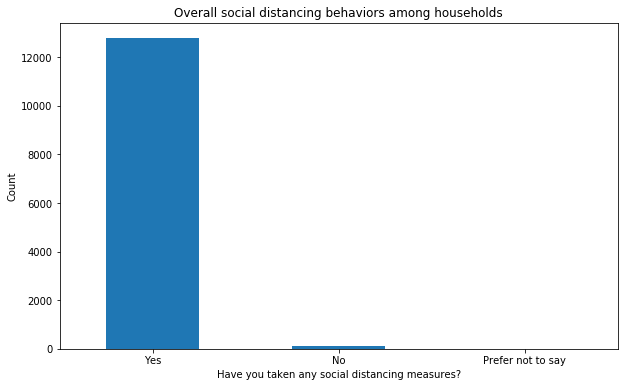

In [135]:
# household level
behavior = pd.DataFrame({'behave':chart3_vals}, index = chart3_labels)
TBplot = behavior.plot.bar(legend = False, figsize=(10,6));
plt.title('Overall social distancing behaviors among households')
plt.xticks(rotation=0);
plt.xlabel('Have you taken any social distancing measures?')
plt.ylabel('Count');

In [138]:
trace = go.Bar(
                y=chart3_vals,
                x=chart3_labels,
                marker=dict(color='blue',line=dict(color='black',width=1)))

data = [trace]
layout = dict(title = 'Overall social distancing behaviors among households',
              yaxis= dict(title= 'Count',ticklen= 5, zeroline= False),
              xaxis= dict(title= 'Have you taken any social distancing measures?',ticklen= 5,zeroline= False),
              autosize=False, 
              width=800,
              height=500)
    
fig = dict(data = data, layout = layout)
iplot(fig)

> Individual behavior frequency plot was already included in Dr. Lind's survey tables, but I can replicate if needed.

## Access to care

In [139]:
df15 = df15[2:]
df15 = df15.rename(columns={"NOTE: this is household level": "start_week", "Which of the following are you having challenges accessing this week?": "Unnamed: 7"})

In [140]:
df15_clean = df15.drop(df15.index[-1])

In [141]:
# totals
apptmt = df15_clean.iloc[:,2:7].sum(axis=1)
php = df15_clean.iloc[:,7:9].sum(axis=1)
hhp = df15_clean.iloc[:,9:11].sum(axis=1)
food = df15_clean.iloc[:,11:13].sum(axis=1)
util = df15_clean.iloc[:,13:15].sum(axis=1)
mhr = df15_clean.iloc[:,15:17].sum(axis=1)
ss = df15_clean.iloc[:,17:19].sum(axis=1)
hcs = df15_clean.iloc[:,19:21].sum(axis=1)
none = df15_clean.iloc[:,21:23].sum(axis=1)

In [142]:
# convert to percent
apptmtperc = np.array(df15_clean['Unnamed: 2'] / apptmt)
telemedperc = np.array(df15_clean['Unnamed: 6'] / apptmt)
phpperc = np.array(df15_clean['Unnamed: 7'] / php)
hhpperc = np.array(df15_clean['Unnamed: 9'] / hhp)
foodperc = np.array(df15_clean['Unnamed: 11'] / food)
utilperc = np.array(df15_clean['Unnamed: 13'] / util)
mhrperc = np.array(df15_clean['Unnamed: 15'] / mhr)
ssperc = np.array(df15_clean['Unnamed: 17'] / ss)
hcsperc = np.array(df15_clean['Unnamed: 19'] / hcs)
noneperc = np.array(df15_clean['Unnamed: 21'] / none)

In [143]:
total_access = pd.DataFrame({'start_week':df15_clean['start_week'], 'apptmts':apptmtperc, 'telemedicine':telemedperc, 'php':phpperc, 'hhp':hhpperc, 'food':foodperc, 'utilities':utilperc, 'mhr':mhrperc, 'ss':ssperc, 'hcs':hcsperc, 'none':noneperc})

In [144]:
total_access

,start_week,apptmts,telemedicine,php,hhp,food,utilities,mhr,ss,hcs,none
2,20APR2020,0.169329,0.114377,0.0792142,0.315589,0.0405577,0.00506971,0.0278834,0.0576679,0.026616,0.593156
3,27APR2020,0.114667,0.106133,0.0676891,0.280275,0.0343733,0.00475939,0.0200952,0.0417768,0.0248546,0.621893
4,04MAY2020,0.0783718,0.0899149,0.0625,0.272837,0.0432692,0.00480769,0.015625,0.031851,0.0180288,0.638822
5,11MAY2020,0.0670512,0.0706561,0.0535714,0.23,0.0292857,0.00357143,0.0128571,0.0335714,0.0142857,0.67
6,18MAY2020,0.0524161,0.0573301,0.0413961,0.173701,0.0146104,0.00487013,0.0121753,0.0275974,0.0121753,0.734578
7,25MAY2020,0.0320285,0.047153,0.022827,0.131694,0.0114135,0.00438982,0.0114135,0.022827,0.00614574,0.782265
8,01JUN2020,0.0385375,0.0375494,0.0255906,0.120079,0.015748,0.0019685,0.00492126,0.023622,0.00492126,0.80315
9,08JUN2020,0.0390947,0.0504115,0.0122825,0.105425,0.0143296,0.00102354,0.00818833,0.0225179,0.00716479,0.812692
10,15JUN2020,0.0547645,0.0525739,0.0130862,0.0970556,0.00981461,0.00218103,0.00981461,0.0163577,0.00981461,0.815703
11,22JUN2020,0.0492721,0.0447928,0.0188889,0.1,0.0111111,0.00333333,0.01,0.0211111,0.0111111,0.823333


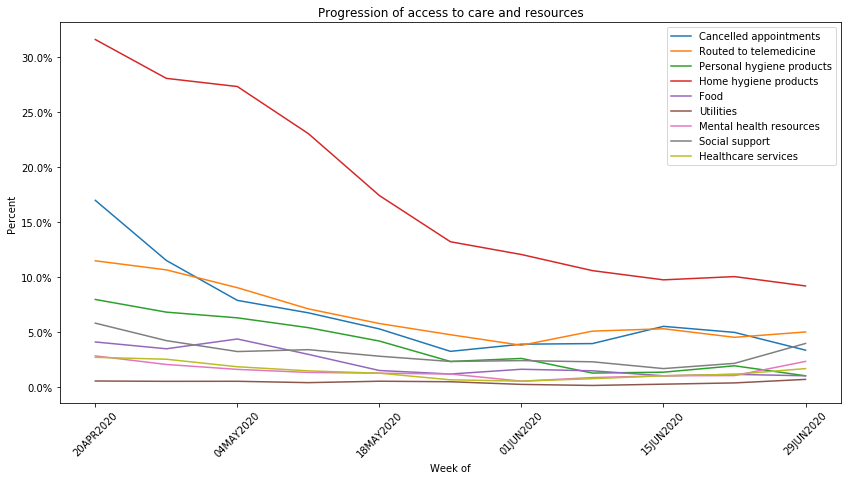

In [145]:
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(14,7))
plot8 = total_access.plot.line(x="start_week", y="apptmts", label = 'Cancelled appointments', ax=ax)
plot8.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot9 = total_access.plot.line(x="start_week", y="telemedicine", label = 'Routed to telemedicine', ax=ax)
plot9.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot10 = total_access.plot.line(x="start_week", y="php", label = 'Personal hygiene products', ax=ax)
plot10.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot11 = total_access.plot.line(x="start_week", y="hhp", label = 'Home hygiene products', ax=ax)
plot11.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot12 = total_access.plot.line(x="start_week", y="food", label = 'Food', ax=ax)
plot12.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot13 = total_access.plot.line(x="start_week", y="utilities", label = 'Utilities', ax=ax)
plot13.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot14 = total_access.plot.line(x="start_week", y="mhr", label = 'Mental health resources', ax=ax)
plot14.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot15 = total_access.plot.line(x="start_week", y="ss", label = 'Social support', ax=ax)
plot15.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plot16 = total_access.plot.line(x="start_week", y="hcs", label = 'Healthcare services', ax=ax)
plot16.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
# this line was left out because it skewed the graph disproportionately
# plot17 = total_access.plot.line(x="start_week", y="none", label = 'None', ax=ax)
# plot17.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.xticks(rotation=45);
plt.title('Progression of access to care and resources')
plt.xlabel('Week of')
plt.ylabel('Percent');

In [147]:
# Creating trace1
trace1 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['apptmts'],
                    mode = "lines",
                    name = "Cancelled appointments",
                    marker = dict(color = 'blue'))


# Creating trace2
trace2 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['telemedicine'],
                    mode = "lines",
                    name = "Routed to telemedicine",
                    marker = dict(color = 'orange'))

# Creating trace3
trace3 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['php'],
                    mode = "lines",
                    name = "Personal hygiene products",
                    marker = dict(color = 'green'))

# Creating trace4
trace4 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['hhp'],
                    mode = "lines",
                    name = "Home hygiene products",
                    marker = dict(color = 'red'))

# Creating trace5
trace5 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['food'],
                    mode = "lines",
                    name = "Food",
                    marker = dict(color = 'purple'))

# Creating trace6
trace6 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['utilities'],
                    mode = "lines",
                    name = "Utilities")

# Creating trace7
trace7 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['mhr'],
                    mode = "lines",
                    name = "Mental health resources")

# Creating trace8
trace8 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['ss'],
                    mode = "lines",
                    name = "Social support")

# Creating trace9
trace9 = go.Scatter(
                    x = total_access['start_week'],
                    y = total_access['hcs'],
                    mode = "lines",
                    name = "Healthcare services")

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]

layout = dict(title = 'Progression of access to care and resources',
              xaxis= dict(title= 'Week of',ticklen= 5,tickangle = 45, zeroline= False),
              yaxis= dict(title= 'Percent',ticklen= 5,zeroline= False, tickformat = ',.0%'),
              autosize=False, 
              width=1000,
              height=700)
fig = dict(data = data, layout = layout)
iplot(fig)

## Household distribution by zipcode

In [118]:
df16 = df16[1:]

In [119]:
df16['Unnamed: 1']=df16['Unnamed: 1'].astype(str)

C:\Users\Harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
import folium
map = folium.Map(location=[32.248814, -110.987419], default_zoom_start=15)

In [114]:
map.choropleth(geo_data="az_arizona_zip_codes_geo.min.json",
             data=df16, # my dataset
             columns=['Unnamed: 1', 'Unnamed: 2'], # zip code is here for matching the geojson zipcode, sales price is the column that changes the color of zipcode areas
             key_on='feature.properties.ZCTA5CE10', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='households')

> I was having some trouble trying to make this choropleth map for household distribution. I think it may be because of the geo_data source file that I tried using, since it's for all AZ zip codes and not for Tucson. I tried finding one for Tucson but wasn't able to. If possible, I'd love some feedback on what would be the correct method to graph something like this through Python, perhaps using folium wasn't the best idea.

## Recent travel

> Insufficient data 